# Fake news Classifier project by Mohit Kothari - 101411645 and Pinkush Gaba - 101411794

## Importing packages

### Why are we importing pad_sequence?
##### Importane: Whenever giving an input to our neural network, we have to make sure that our input length is same throughout the training process.
###### Process: Padding is a special form of masking where the masked steps are at the start or the end of a sequence. Padding comes from the need to encode sequence data into contiguous batches: in order to make all sequences in a batch fit a given standard length, it is necessary to pad or truncate some sequences.
###### When processing sequence data, it is very common for individual samples to have different lengths.  Since the input data for a deep learning model must be a single tensor, samples that are shorter than the longest item need to be padded with some placeholder value such as 0.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.python.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.python.keras.layers import LSTM, GRU
from tensorflow.python.keras.layers import Dense, Dropout

import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heyia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df=pd.read_csv('./Dataset/train.csv')
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


### Total number of Categorical columns

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

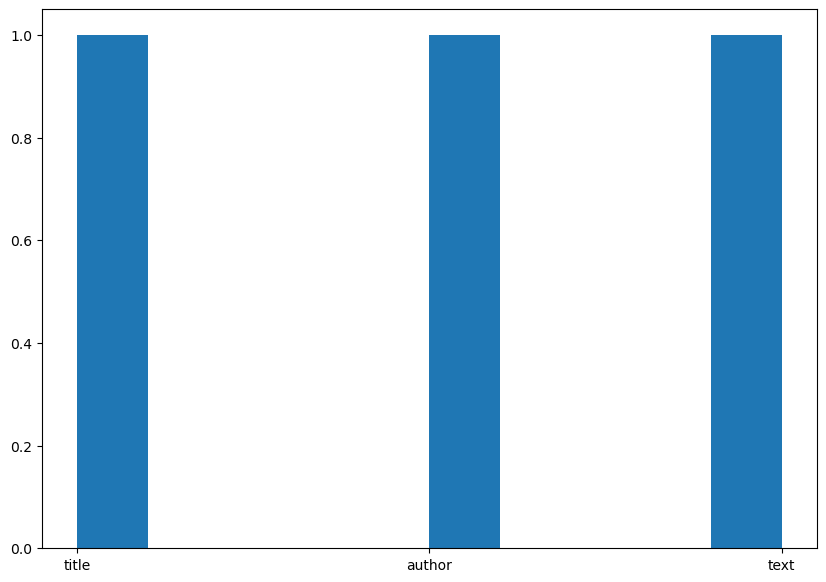

In [4]:
x=df.select_dtypes(object).columns.tolist()
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(x)

### Total number of Numerical columns

In [5]:
df.select_dtypes(int).columns.tolist()

['id', 'label']

### Total number of Missing columns

In [6]:
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'id'),
  Text(1, 0, 'title'),
  Text(2, 0, 'author'),
  Text(3, 0, 'text'),
  Text(4, 0, 'label')])

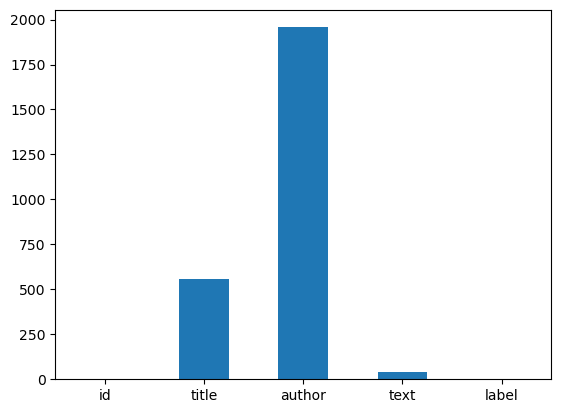

In [7]:
df.isna().sum().plot(kind='bar')
plt.xticks(rotation = 0)

#### Dropping NaN values

In [8]:
df=df.dropna()
df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


#### Checking for Null values

In [9]:
df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

#### Checking the shape of the dataset

In [10]:
df.shape

(18285, 5)

#### Checking test length statistics

In [11]:
text_len=df.text.str.split().str.len()
print(text_len.describe())

count    18285.000000
mean       803.122942
std        886.230161
min          0.000000
25%        304.000000
50%        610.000000
75%       1092.000000
max      24234.000000
Name: text, dtype: float64


#### Checking title length statistics

In [12]:
title_len=df.title.str.split().str.len()
print(title_len.describe())

count    18285.000000
mean        12.524255
std          4.023303
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

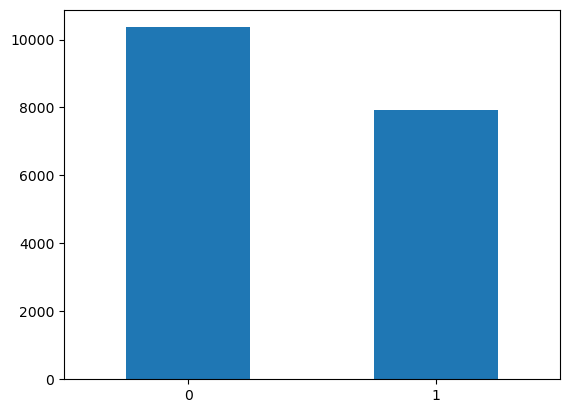

In [13]:
df.label.value_counts().plot(kind='bar')
plt.xticks(rotation=0)

#### Spliting dependent variable and independent variable

In [14]:
X=df.drop('label',axis=1)

In [15]:
X.shape

(18285, 4)

In [16]:
y=df['label']

In [17]:
y.shape

(18285,)

### Setting up Vocabular Size

In [18]:
voc_size= 5000

In [19]:
messages=X.copy()

In [20]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [21]:
messages.reset_index(inplace=True)

#### Data CLeaning

In [22]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
!pip3 install wordcloud

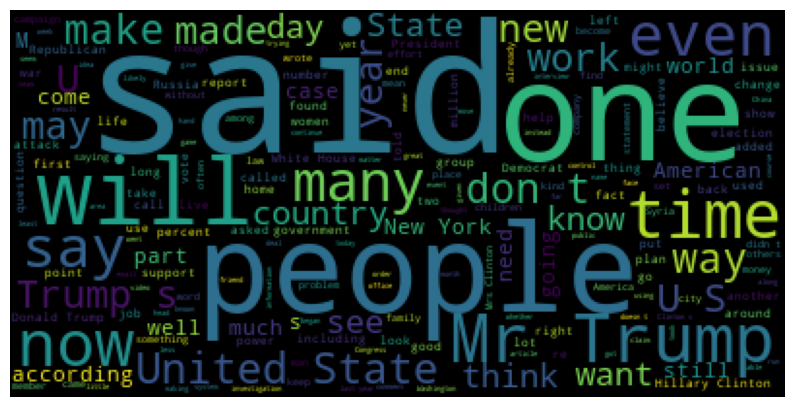

In [24]:
from wordcloud import WordCloud, STOPWORDS

# initialize the word cloud
wordcloud = WordCloud( background_color='black')
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(df['text']))
# plotting the word cloud
plt.figure(figsize=(10,20))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

#### Word Cloud of Fake news 

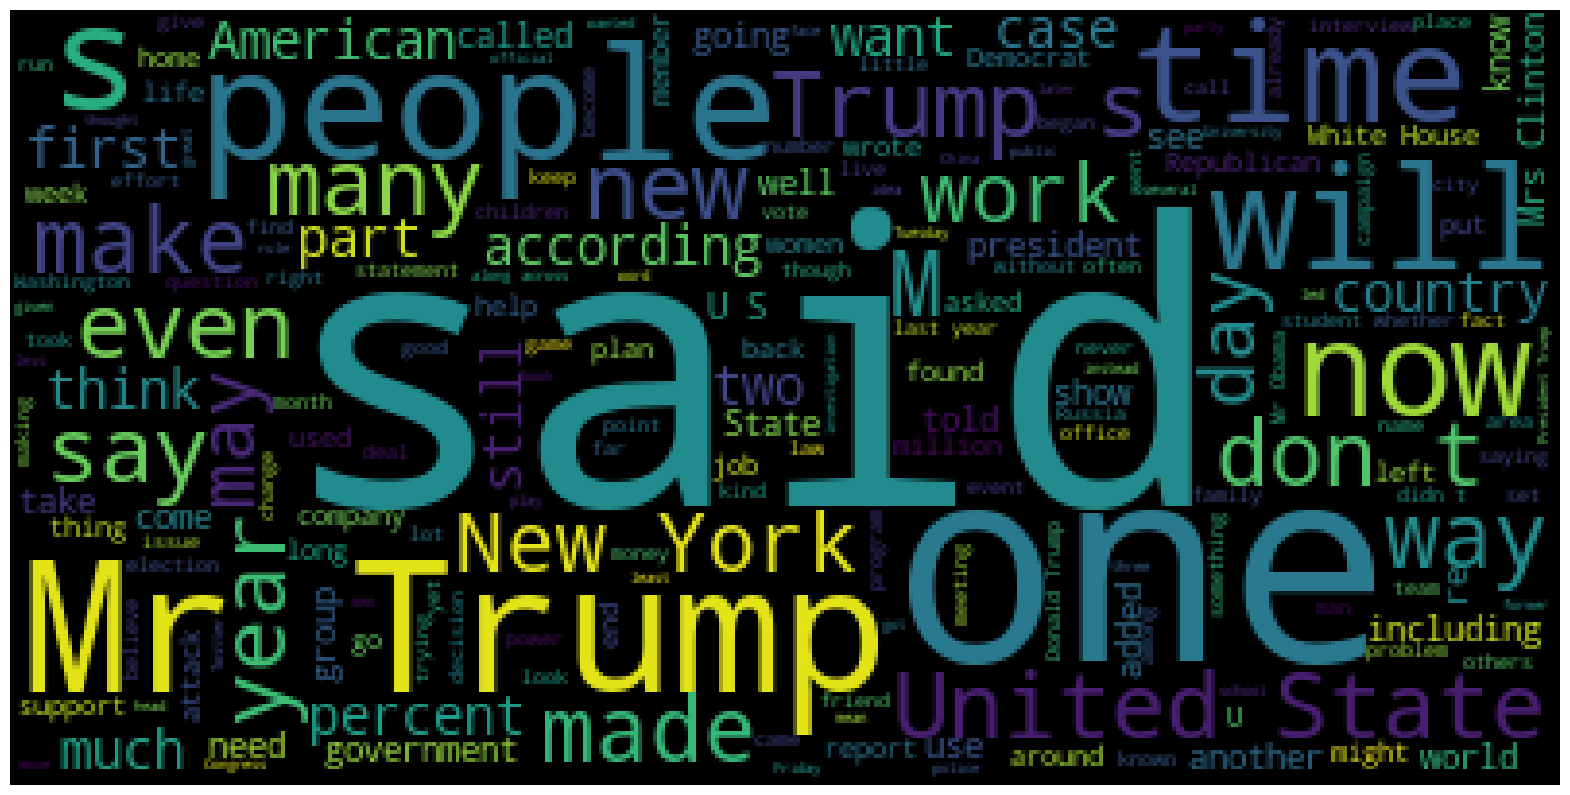

In [25]:
label_0 = ' '.join(df[df['label']==0]['text']) 
wc = wordcloud.generate(label_0)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

#### Word cloud of real news

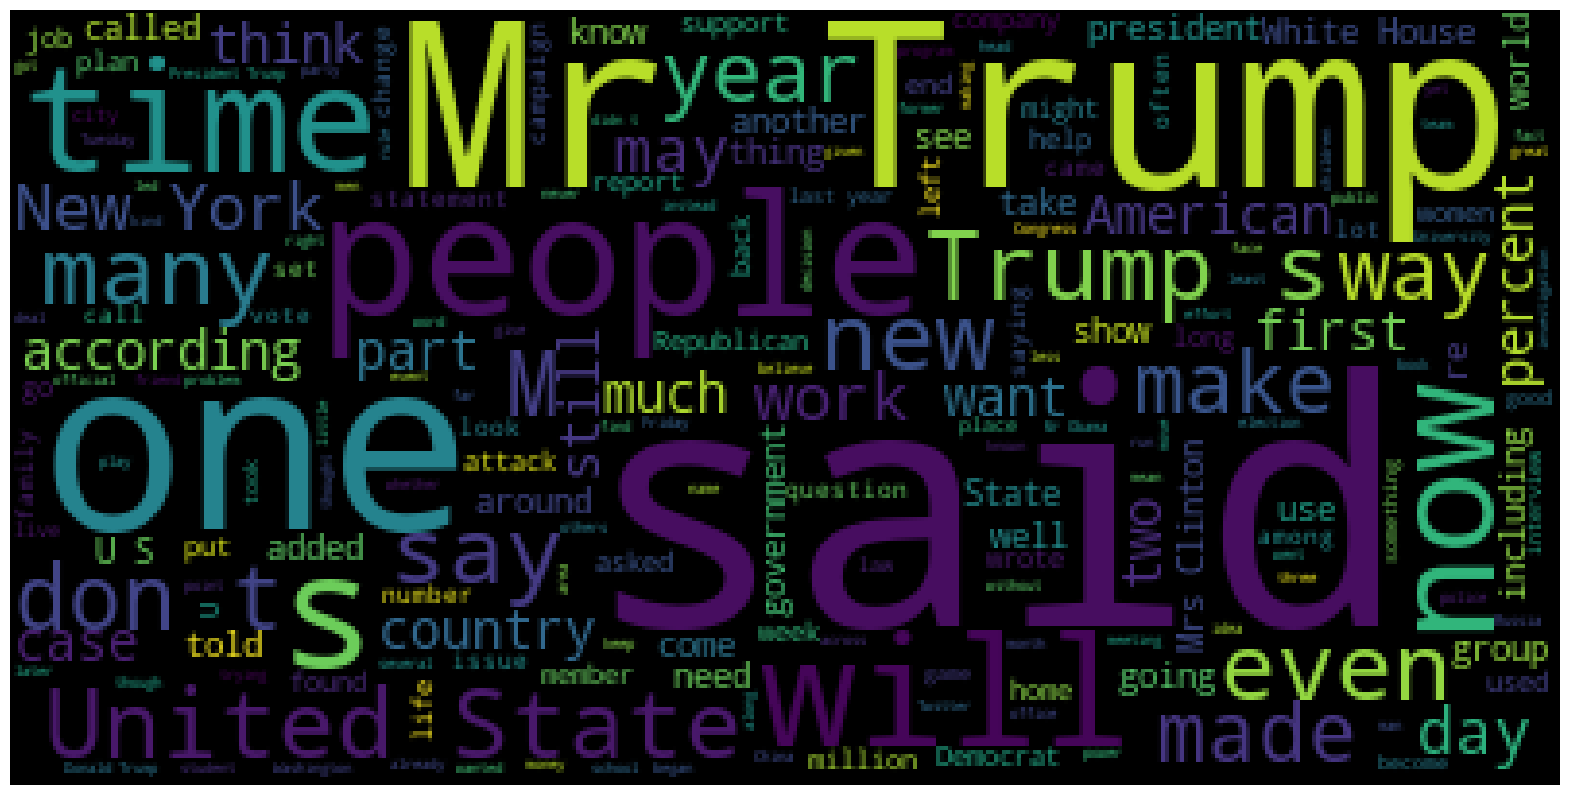

In [26]:
label_0 = ' '.join(df[df['label']==0]['text']) 
wc = wordcloud.generate(label_0)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

#### One Hot Representation of Corpus

In [27]:
one_hot_representation=[one_hot(words,voc_size)for words in corpus]
print(one_hot_representation)

[[668, 4739, 4292, 713, 2594, 2672, 437, 3288, 4986, 692], [4150, 3158, 2546, 3016, 1448, 1274, 2021], [680, 123, 4554, 2760], [3858, 2377, 2843, 240, 2032, 2303], [2625, 1448, 4888, 3420, 1771, 2307, 1448, 2985, 149, 3107], [3047, 1267, 2936, 190, 3614, 2142, 2786, 365, 736, 4517, 4951, 2874, 3930, 3827, 2021], [4594, 668, 2135, 3259, 2748, 4719, 276, 879, 4925, 1780, 2435], [2580, 1056, 179, 1589, 4084, 1293, 2142, 2175, 4925, 1780, 2435], [3885, 1185, 4645, 3881, 2606, 3762, 3118, 2039, 2142, 3632], [2147, 846, 387, 4942, 1603, 2596, 2018, 315], [2343, 1441, 4447, 2272, 4871, 4640, 2473, 3809, 1570, 944, 186], [240, 4416, 2594, 3762, 2142, 4084], [1868, 3291, 1975, 2058, 3512, 1672, 3867, 2206, 4823], [4633, 4597, 4870, 810, 1185, 22, 4283, 4925, 1780, 2435], [21, 71, 1883, 2326, 1182, 4925, 1780, 2435], [4005, 4923, 564, 2051, 1879, 3045, 4808, 1086, 2528, 4843], [4682, 3545, 3158], [2930, 3404, 2622, 73, 2142, 3537, 4561, 2021], [3661, 35, 2546, 3147, 207, 127, 1681, 3087, 2307], 

#### Applying_padding

In [28]:
sent_length=20
embedded_docs=pad_sequences(one_hot_representation,padding='post',maxlen=sent_length)
print(embedded_docs)

[[ 668 4739 4292 ...    0    0    0]
 [4150 3158 2546 ...    0    0    0]
 [ 680  123 4554 ...    0    0    0]
 ...
 [2448 4890  838 ...    0    0    0]
 [4956 4084 2732 ...    0    0    0]
 [3187 4713 1513 ...    0    0    0]]


## 1. Creating a NN with 2 LSTM layers

##### ReLu activation function returns 0 if the input is negative and returns the input itself if the input is positive. We are using ReLu initially because is simple to implement and computationally efficient, and it has been shown to work well in many deep learning applications.

In [29]:
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(128, input_shape=(X.shape[1:]), activation='relu', return_sequences=True)) # if we are going to another Recurrent network then we want return sequence
model.add(LSTM(128, activation='relu'))
model.add(Dense(1,activation='sigmoid')) # to get probablity betwenn 0 to 1 for binary classification we are using sigmoid over here.
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 20, 128)           86528     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 418,241
Trainable params: 418,241
Non-trainable params: 0
_________________________________________________________________
None


## 2. Creating a NN with single LSTM layer

In [31]:
embedding_vector_features1=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features1,input_length=sent_length))
model1.add(LSTM(100)) # selecting only the number of neurons
model1.add(Dense(1,activation='sigmoid')) # to get probablity betwenn 0 to 1 for binary classification we are using sigmoid over here.
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
embedded_docs

array([[ 668, 4739, 4292, ...,    0,    0,    0],
       [4150, 3158, 2546, ...,    0,    0,    0],
       [ 680,  123, 4554, ...,    0,    0,    0],
       ...,
       [2448, 4890,  838, ...,    0,    0,    0],
       [4956, 4084, 2732, ...,    0,    0,    0],
       [3187, 4713, 1513, ...,    0,    0,    0]])

In [33]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [34]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [35]:
X_final.shape,y_final.shape

((18285, 20), (18285,))

#### Applying Early Stopping

In [37]:
# using early stoppoing for the regularizing the model by preventing it from training for too many iterations, which can lead to overfitting. By using early stopping, we can find a good balance between training the model enough to learn the patterns in the data, but not so much that it starts memorizing the training data and fails to generalize to new data.

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

#### Training the model

In [ ]:
from keras.api._v2.keras import callbacks
model_histroy=model.fit(X_train,y_train,validation_split=0.33,batch_size=16,epochs=16,callbacks=early_stopping)

Epoch 1/16
513/513 [==============================] - 81s 157ms/step - loss: 0.3534 - accuracy: 0.9347 - val_loss: 6.6049 - val_accuracy: 0.8941
Epoch 2/16
513/513 [==============================] - 77s 151ms/step - loss: 0.1863 - accuracy: 0.9826 - val_loss: 63.4329 - val_accuracy: 0.8983
Epoch 3/16
513/513 [==============================] - 78s 152ms/step - loss: 0.1316 - accuracy: 0.9879 - val_loss: 52.3041 - val_accuracy: 0.8954
Epoch 4/16
513/513 [==============================] - 80s 157ms/step - loss: 0.0336 - accuracy: 0.9928 - val_loss: 109.8982 - val_accuracy: 0.8964
Epoch 5/16
513/513 [==============================] - 80s 155ms/step - loss: 0.0185 - accuracy: 0.9951 - val_loss: 118.5079 - val_accuracy: 0.8949
Epoch 6/16
513/513 [==============================] - 79s 154ms/step - loss: 0.0149 - accuracy: 0.9952 - val_loss: 224.3611 - val_accuracy: 0.8946
Epoch 7/16
513/513 [==============================] - 81s 158ms/step - loss: 0.0141 - accuracy: 0.9966 - val_loss: 102.015

#### Here we got testing accuracy around 90% which is good one. And we are also running only one epoch for RNN with single LSTM that took more time and there is no bigger difference between accuracies.

#### Trainig the model with single NN

In [41]:
model_histroy1=model1.fit(X_train,y_train,validation_split=0.33,batch_size=8,epochs=1,callbacks=early_stopping)

1026/1026 [==============================] - 105s 102ms/step - loss: 0.0191 - accuracy: 0.9935 - val_loss: 0.4400 - val_accuracy: 0.9100


#### Plot train accuracy vs test accuracy

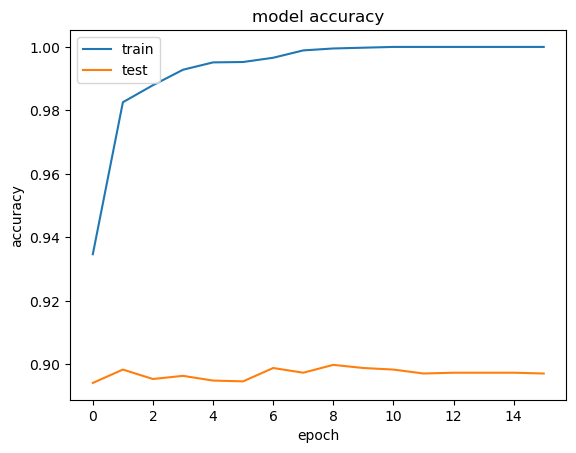

In [ ]:
plt.plot(model_histroy.history['accuracy'])
plt.plot(model_histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

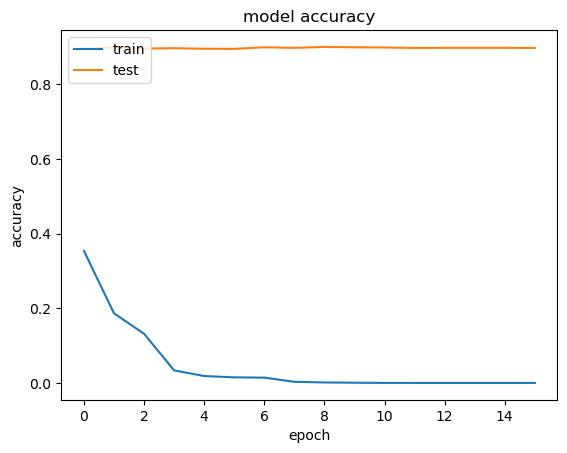

In [ ]:
plt.plot(model_histroy.history['loss'])
plt.plot(model_histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_preds=model.predict(X_test)
y_preds=(y_preds>=0.5) # Whenever value>=0.5 it takes 1 else 0

In [ ]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_preds)

array([[3075,  344],
       [ 286, 2330]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_preds)
print(score)

0.8956089478044739
